<a href="https://colab.research.google.com/github/duiliod/AM/blob/main/TP3_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP 3 Aprendiaje Maquinal
##Deangeli Duilio

In [1]:
#imports
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score,f1_score
import matplotlib.pyplot as plt
from sklearn import neighbors
import pandas as pd

# 3.1

test size is 0.525


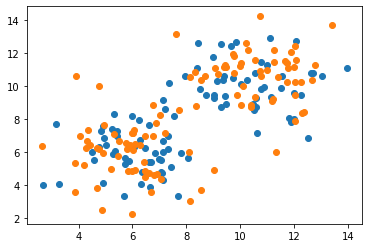

In [23]:
# @title cluster {run:"auto"}

def plot_cluster(x1,x2):

  plt.scatter(x1[:,0],x1[:,1])
  plt.scatter(x2[:,0],x2[:,1])

mu_x1 = 6 #@param {type:"slider", min:5, max:10, step:1}
std_x1 = 1.5 #@param {type:"slider", min:0, max:2, step:0.1}
mu_x2 = 10.5 #@param {type:"slider", min:8, max:15, step:0.5}
std_x2 = 1.5 #@param {type:"slider", min:0, max:2, step:0.1}
N = 95 #@param {type:"slider", min:50, max:150, step:5}

def gauss_2d(mu, sigma):
    x = np.random.normal(mu, sigma,100)
    y = np.random.normal(mu, sigma,100)
    data= np.array((x,y))
    data = data.reshape((100,2))
    return data

x1 = gauss_2d(mu_x1,std_x1)
y1 = np.zeros((100))

x2 = gauss_2d(mu_x2,std_x2)
y2 =np.ones((100))

X = np.concatenate((x1,x2),axis=0)
y_true = np.concatenate((y1,y2))
size_test = 1-N/200
print('test size is {}'.format(size_test))
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=size_test, random_state=77)


plot_cluster(X_train,X_test)

In [24]:
# @title knn {run:"auto"}

def classification(predict):

  print('Accuracy: {}'.format(accuracy_score(y_test,predict)))
  print('Precision: {}'.format(precision_score(y_test,predict)))
  print('F1 score: {}'.format(f1_score(y_test,predict)))


n_neighbors = 4 #@param {type:"slider", min:3, max:10, step:1}

#KNN
knn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X_train, y_train)
predict = knn.predict(X_test)

classification(predict)

Accuracy: 0.9904761904761905
Precision: 0.9811320754716981
F1 score: 0.9904761904761905


#3.3

In [25]:
attributes_spotify = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBOM/data/attributes_spotify.csv")
attributes_spotify.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [26]:
Target = attributes_spotify[['target']]
del attributes_spotify["target"]

#we deleted these attributes cuz are redundant
del attributes_spotify["song_title"]
del attributes_spotify["artist"]

#normalization of the dataframe
normalized_df=(attributes_spotify-attributes_spotify.mean())/attributes_spotify.std()

In [21]:
# @title classificator {run:"auto"}

n_neighbors = 7 #@param {type:"slider", min:4, max:10, step:1}
X_train, X_test, y_train, y_test = train_test_split(normalized_df, Target, test_size=0.30, random_state=77)

#KNN
knn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [22]:
print(knn.score(X_test,y_test))
predict = knn.predict(X_test)

print('Accuracy: {}'.format(accuracy_score(y_test,predict)))
print('Precision: {}'.format(precision_score(y_test,predict)))
print('F1 score: {}'.format(f1_score(y_test,predict)))

0.9356435643564357
Accuracy: 0.9356435643564357
Precision: 0.9583333333333334
F1 score: 0.9387755102040817
